# Python for Data Science
For starting the workshop, please make sure you have anaconda installed. We will use python 3 for this workshop. 

The material for the course is available at 
https://github.com/alexanderbuchholz/cudss_workshops/blob/master/python_for_data_science_workshop/python_for_data_science_workshop.ipynb


## Main tools in python for data science
The main tools/libraries that you need to learn for doing data science are the following (this is of course a bit subjective!):
1. Numpy, (numeric python). This library handles matrices, vectors and matrix-vector calculations. The underlying code is written in C. 
2. Pandas. It is a data handling library that allows you to load your data, visualize and preprocess it. Essential for gettig the first insights! 
3. Matplotlib and seaborn. Two libraries that can be used to make nice plots of your data. 
4. Sklearn (scikit learn). To run all your fancy models. All models are set up in the same way: you create your model, fit (train) it and make predictions of unseen data. 

## Ipython (jupyter) notebooks
Notebooks are a good way of playing around with your data and test different things. However, be careful as you can execute your cells in various orders. 
You can start with a notebook and easily turn it into something presentable using Markdown choosing different cell types.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
# this line lets us have the plot shown without calling "plt.show()"
%matplotlib inline


The import "xxx" as "x" is the standard in python. Stick to the naming conventions, as this will make your code more readable. 

Let us now read a dataset, more precisely the Pima diabetes dataset. This data was is a benchmark for testing machine learning algorithms (nowadays, it is considered too simple). It contains information on a group of Pima, a native american tribe. In the dataset, there are 768 female individuals, some of which suffer from diabetes. Our aim is to predict whether an individual suffers from diabetes given other indicators (bmi, pregnancy record...). 
For more information see here: 
https://www.kaggle.com/uciml/pima-indians-diabetes-database

The variables in the data set are: 

Pregnancies - Number of times pregnant

Glucose - Plasma glucose concentration after 2 hours (oral glucose tolerance test)

BloodPressure - Diastolic blood pressure (mm Hg)

SkinThickness - Triceps skin fold thickness (mm)

Insulin - 2-Hour serum insulin (mu U/ml)

BMI - Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction - Diabetes pedigree function

Age - Age (years)

Outcome - Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [6]:
pima_all = pd.read_csv("pima-indians-diabetes.csv", header=None)

What does this command do? Try to find out more by using "help(pd.read_csv)".

If the previous command does not work, try to specify the path where the file is located. 

In [7]:
pima_all.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
pima_all.columns = ['num_pregnant', 'glucose', 'pressure', 'skin', 'insulin', 'bmi', 'pedigree' , 'age', 'diab_class']

In [9]:
pima_all.head()

,num_pregnant,glucose,pressure,skin,insulin,bmi,pedigree,age,diab_class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


What problems do you see here? 

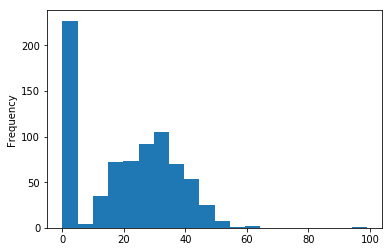

In [10]:
pima_all.skin.plot.hist(bins=20)

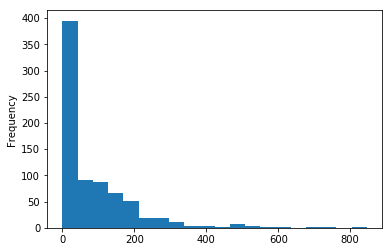

In [11]:
pima_all.insulin.plot.hist(bins=20)

### Exercise: 
Look at the other variables and see if you can find anything suspicious.

In [12]:
pima_all.head()

,num_pregnant,glucose,pressure,skin,insulin,bmi,pedigree,age,diab_class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
pima_all.describe()

,num_pregnant,glucose,pressure,skin,insulin,bmi,pedigree,age,diab_class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Let's take a more systematic approach: replace zero values by missing values.

In [14]:
pima_all.iloc[:,[1,2,3,4,5]] = pima_all.iloc[:,[1,2,3,4,5]].replace(0, np.NaN)

What does this command do? 

In [15]:
pima_all.describe()

,num_pregnant,glucose,pressure,skin,insulin,bmi,pedigree,age,diab_class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Let's try to understand what drives diabetes.
We will use a different library that yields some nice plots, called seaborn. 

Text(0.5,0,'Diabetes status')

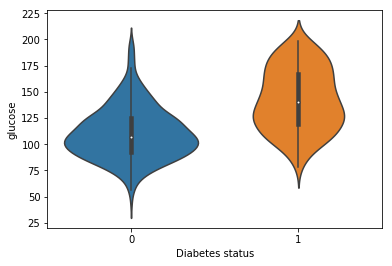

In [16]:
sns.violinplot(x="diab_class", y="glucose", data=pima_all)
plt.xlabel('Diabetes status') 

In [28]:
print pima_all.diab_class.mean() # what does this number tell you?
my_tab = pd.crosstab(index=pima_all["diab_class"],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab

0.348958333333


col_0,count
diab_class,
0,500
1,268


### Exercise
Make some more violin plots for the other variables.

In [22]:
pima_all.groupby('diab_class').mean()

,num_pregnant,glucose,pressure,skin,insulin,bmi,pedigree,age
diab_class,,,,,,,,
0,3.298000,110.643863,70.877339,27.235457,130.287879,30.859674,0.429734,31.190000
1,4.865672,142.319549,75.321429,33.000000,206.846154,35.406767,0.550500,37.067164


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4aa31add50>,
      dtype=object)

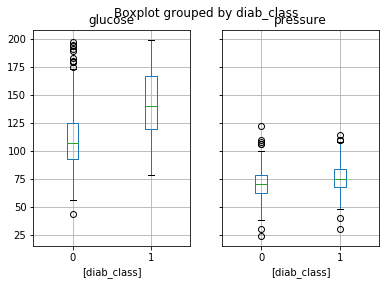

In [23]:
pima_all[['glucose', 'pressure', 'diab_class']].boxplot(by='diab_class')

What can you say about the factors that drive diabetes based on the first two plots?

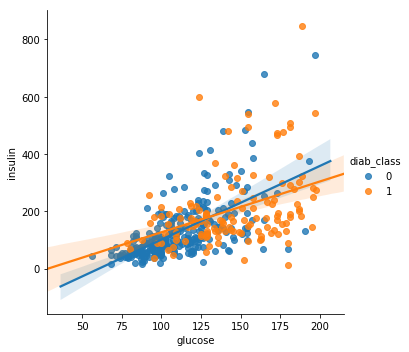

In [24]:
sns.lmplot(x='glucose', y='insulin', data=pima_all, hue='diab_class')

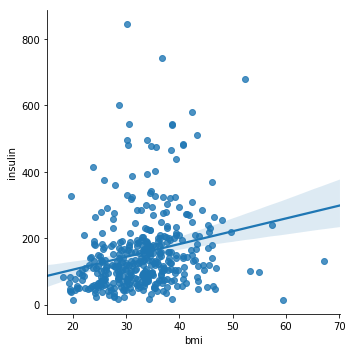

In [29]:
sns.lmplot(x='bmi', y='insulin', data=pima_all)

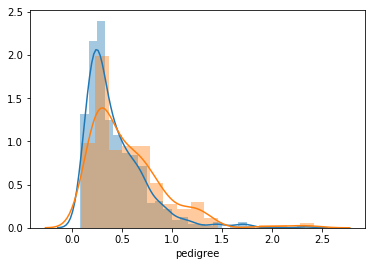

In [30]:
sns.distplot(pima_all[pima_all['diab_class']==0].pedigree)
sns.distplot(pima_all[pima_all['diab_class']==1].pedigree)
#plt.savefig('two_histograms.pdf')

How do we handle missing values? 
One way is to drop all lines with missing values.


In [31]:
pima_all.dropna().describe()

,num_pregnant,glucose,pressure,skin,insulin,bmi,pedigree,age,diab_class
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


What is the problem here? 

A better approach: impute missing values using for example the mean or the most frequent value. We will use the imputing method provided by pandas.

In [32]:
pima_all.fillna(pima_all.mean(), inplace=True) # can you explain what this command does?

In [33]:
pima_all.describe()

,num_pregnant,glucose,pressure,skin,insulin,bmi,pedigree,age,diab_class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Training a model
First step: split the data into a train and a test dataset.
sklearn is a library that contains a lot of machine learning algorithms.

In [34]:
from sklearn.model_selection import train_test_split

We have to transform the data first. 

In [35]:
X = pima_all.iloc[:,0:8].values
y = pima_all.iloc[:,8].values

Now we split the data into a train and a test set.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Exercise: 
What is wrong with this approach? Hint: look at what we did before, how did we preprocess the data?

Now we will fit the first model using only the first three variables: num_pregnant, glucose, pressure. 

In [37]:
from sklearn.linear_model import LogisticRegression

# Logistic regression:
### What is a logistic regression?
A logistic regression is a model that assigns to every outcome (diabetes or not) a probability between 0 and 1. 
The idea is that every individual that we observe can be represented as the observation of a coin flip (either 0 or 1). However every coin is different for all individiuals. That means every individual has its own unique coin. The properties of this unique coin are determined by the observed covariates (the bmi for instance). We assume that there is a shared way of how the individual covariates influence the properties of the coin. This shared structure allows to learn the parameters that govern the model:

$$
\mathbb{P}(Y_i = 1| X_i) = logit^{-1}(\sum_{j=1}^p x_{i,j} \beta_j)
$$
and $\beta_j$ is the same accross individuals. 
$logit^{-1}(x) = 1/(1+exp(-x))$
Thus, a logistic regression allows us to model the individual probability of having diabetes. 

For more details see here 
https://towardsdatascience.com/understanding-logistic-regression-9b02c2aec102


In [ ]:
logisticmodel = LogisticRegression() # we initiate a model by calling the class.

In [ ]:
logisticmodel.fit(X_train[:,0:3], y_train)

If you want to learn more about how the model is trained, look at maximum likelihood estimation. 

In [ ]:
y_train_pred = logisticmodel.predict(X_train[:,0:3])

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

### Exercise: 
Try to understand what these different evaluation metrics do. 

In [ ]:
confusion_matrix(y_train, y_train_pred)

In [ ]:
y_test_pred = logisticmodel.predict(X_test[:,0:3])
confusion_matrix(y_test, y_test_pred)

In [ ]:
f1_score(y_test, y_test_pred), f1_score(y_train, y_train_pred)

In [ ]:
accuracy_score(y_test, y_test_pred), accuracy_score(y_train, y_train_pred)

### Exercise: 
Also use the other variables. What accuracy do you obtain? 

### Exercise
Use another regression model, the random forest classification (look up how to use it). What is the best score that you get? 

### Exercise
Can you think of a way of how to fix the imputation problem? 
Look at imputation in sklearn and pipelines. This allows you to find a better way of imputation. 

# How to go further: 

## Learning using moocs: 
https://www.coursera.org/learn/python-data-analysis
or using other ressources on coursera

## Learning using kaggle
Kaggle has lot of material, that can get you started. 
For example you might want to look at 
https://www.kaggle.com/learn/overview
